In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
test[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_INSCRICAO     4576 non-null   object 
 1   NU_NOTA_CN       3442 non-null   float64
 2   NU_NOTA_CH       3442 non-null   float64
 3   NU_NOTA_LC       3377 non-null   float64
 4   NU_NOTA_REDACAO  3377 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.9+ KB


In [3]:
print(train.shape, test.shape)

(13730, 167) (4576, 47)


In [4]:
#Tratando os dados de treino
train1 = train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].dropna()
train1_remove = train1.loc[(train['NU_NOTA_CN'] == 0) | (train['NU_NOTA_CH'] == 0) | (train['NU_NOTA_LC'] == 0) | (train['NU_NOTA_MT'] == 0) | (train['NU_NOTA_REDACAO'] == 0)]
train1 = train1.drop(train1_remove.index)

In [5]:
test = test[['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].dropna()
test_remove = test.loc[(test['NU_NOTA_CN'] == 0) | (test['NU_NOTA_CH'] == 0) | (test['NU_NOTA_LC'] == 0) | (test['NU_NOTA_REDACAO'] == 0)]
test = test.drop(test_remove.index)

In [6]:
print(train1.shape, test.shape)

(9850, 5) (3286, 5)


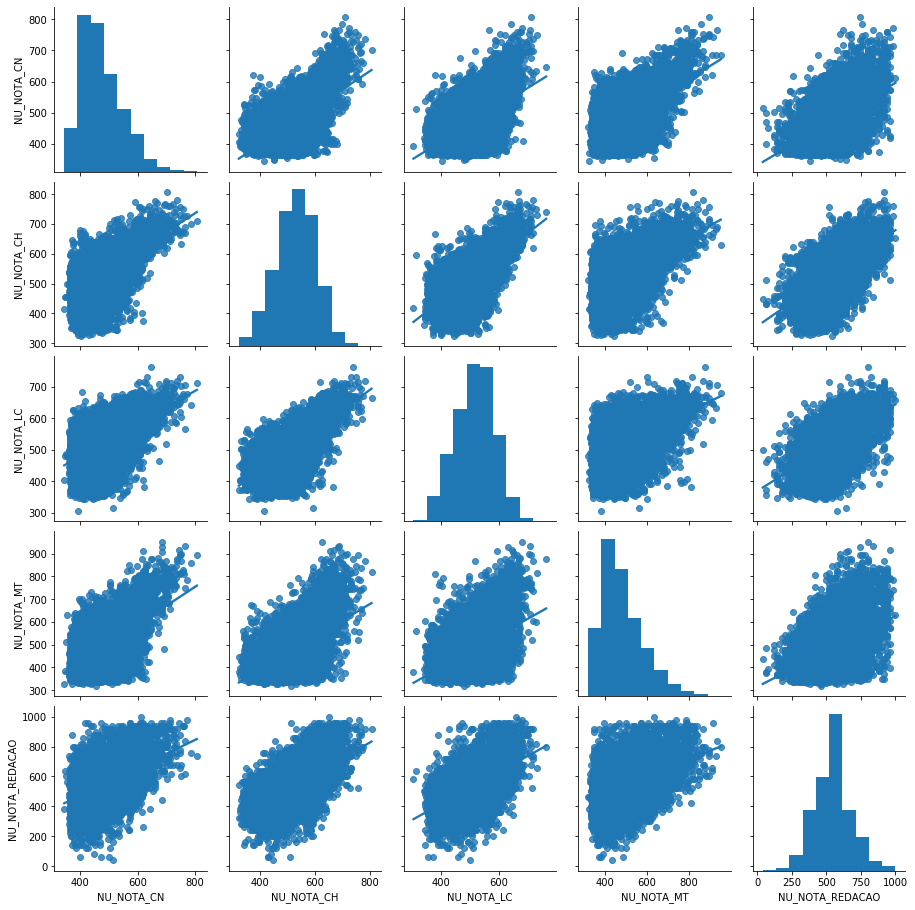

In [7]:
sns.pairplot(train1, kind='reg')

In [8]:
y = train1['NU_NOTA_MT']
X = train1.drop(['NU_NOTA_MT'], axis=1)

In [9]:
model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.score(X ,y)

0.40492359429828495

In [11]:
test['NU_NOTA_MT'] = model.predict(test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']])

In [12]:
answer = test[['NU_INSCRICAO','NU_NOTA_MT']]

In [13]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,437.048189
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.681592
2,b38a03232f43b11c9d0788abaf060f7366053b6d,580.527122
4,715494628a50142ce8cb17191cfe6d0f3cae0934,539.039617
5,e656d6bad65c93fb2880f1eba5037008c8e75774,464.491426


In [15]:
answer.to_csv('answer.csv', index=False, sep=',')